# **1. Prepare Dataset**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import classification_report

In [ ]:
# Import Dataset
df=pd.read_csv('/content/loan_data.csv')
df

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27.0,male,Associate,47971.0,6,RENT,15000.0,MEDICAL,15.66,0.31,3.0,645,No,1
44996,37.0,female,Associate,65800.0,17,RENT,9000.0,HOMEIMPROVEMENT,14.07,0.14,11.0,621,No,1
44997,33.0,male,Associate,56942.0,7,RENT,2771.0,DEBTCONSOLIDATION,10.02,0.05,10.0,668,No,1
44998,29.0,male,Bachelor,33164.0,4,RENT,12000.0,EDUCATION,13.23,0.36,6.0,604,No,1


Bộ dữ liệu này chứa 45.000 bản ghi về người đăng ký vay vốn, với nhiều thuộc tính khác nhau liên quan đến thông tin nhân khẩu học cá nhân, tình hình tài chính và chi tiết khoản vay. Bộ dữ liệu này có thể được sử dụng cho mô hình hóa dự đoán, đặc biệt trong việc đánh giá rủi ro tín dụng và dự đoán khả năng vỡ nợ.

Nội dung bộ dữ liệu

Bộ dữ liệu bao gồm 14 cột đại diện cho các yếu tố khác nhau ảnh hưởng đến việc phê duyệt và vỡ nợ khoản vay:

Thông tin cá nhân

person_age: Tuổi của người đăng ký (tính bằng năm).
person_gender: Giới tính của người đăng ký (nam, nữ).
person_education: Trình độ học vấn (Trung học, Cử nhân, Thạc sĩ, v.v.).
person_income: Thu nhập hàng năm của người đăng ký (bằng đô la Mỹ).
person_emp_exp: Số năm kinh nghiệm làm việc.
person_home_ownership: Loại hình sở hữu nhà (THUÊ, SỞ HỮU, TRẢ GÓP).
Chi tiết khoản vay

loan_amnt: Số tiền vay yêu cầu (bằng đô la Mỹ).
loan_intent: Mục đích vay (CÁ NHÂN, GIÁO DỤC, Y TẾ, v.v.).
loan_int_rate: Lãi suất cho khoản vay (tỷ lệ phần trăm).
loan_percent_income: Tỷ lệ giữa số tiền vay và thu nhập.
Lịch sử tín dụng & vay

cb_person_cred_hist_length: Thời gian lịch sử tín dụng của người đăng ký (tính bằng năm).
credit_score: Điểm tín dụng của người đăng ký.
previous_loan_defaults_on_file: Người đăng ký đã từng có tiền sử vỡ nợ hay chưa (Có hoặc Không).
Biến mục tiêu

loan_status: 1 nếu khoản vay được trả thành công, 0 nếu người đăng ký vỡ nợ.

## **EDA**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

In [ ]:
# No null to handle, good!

In [ ]:
df.describe()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
count,45000.000000,4.500000e+04,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000
mean,27.764178,8.031905e+04,5.410333,9583.157556,11.006606,0.139725,5.867489,632.608756,0.222222
std,6.045108,8.042250e+04,6.063532,6314.886691,2.978808,0.087212,3.879702,50.435865,0.415744
min,20.000000,8.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,390.000000,0.000000
25%,24.000000,4.720400e+04,1.000000,5000.000000,8.590000,0.070000,3.000000,601.000000,0.000000
50%,26.000000,6.704800e+04,4.000000,8000.000000,11.010000,0.120000,4.000000,640.000000,0.000000
75%,30.000000,9.578925e+04,8.000000,12237.250000,12.990000,0.190000,8.000000,670.000000,0.000000
max,144.000000,7.200766e+06,125.000000,35000.000000,20.000000,0.660000,30.000000,850.000000,1.000000


In [ ]:
# Gọi tên biến Target
tar_column='loan_status'

Text(0.5, 1.0, 'Biểu đồ tròn')

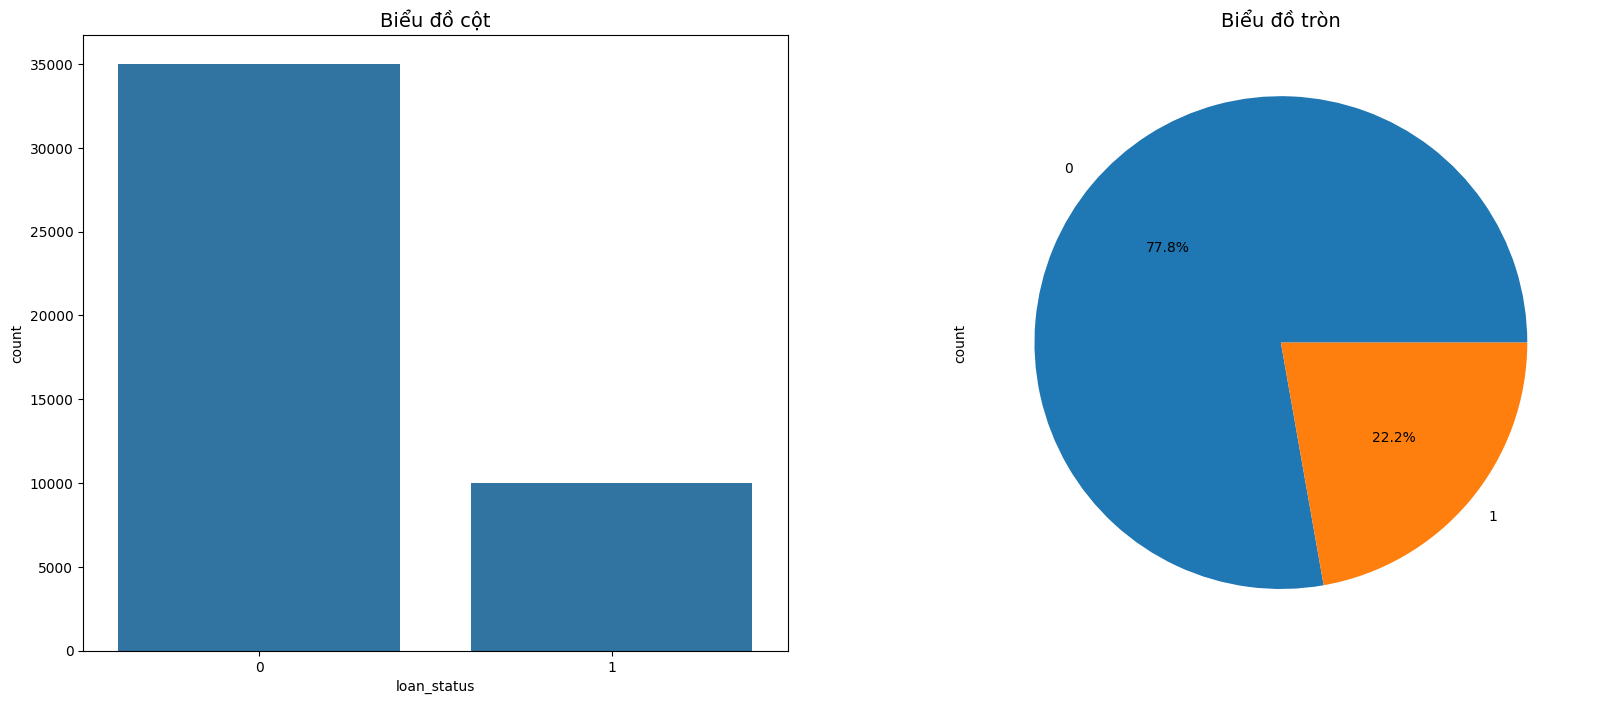

In [ ]:
# Dùng biểu đồ tròn và cột để xem phân bố giá trị trong cột target
f, ax = plt.subplots(ncols= 2, figsize=(20,8))

sns.countplot(x=tar_column, data=df,ax=ax[0])
ax[0].set_title("Biểu đồ cột", fontsize=14)
df[tar_column].value_counts().plot(kind='pie', autopct='%.1f%%', ax=ax[1])
ax[1].set_title("Biểu đồ tròn", fontsize=14)

## **Explore Num cols & Cat cols**

In [ ]:
# Tạo List gọi tên tất cả các cột
All_cols=df.columns.tolist()[:-1] # Bỏ đi cột Tar

In [ ]:
All_cols

['person_age',
 'person_gender',
 'person_education',
 'person_income',
 'person_emp_exp',
 'person_home_ownership',
 'loan_amnt',
 'loan_intent',
 'loan_int_rate',
 'loan_percent_income',
 'cb_person_cred_hist_length',
 'credit_score',
 'previous_loan_defaults_on_file']

In [ ]:
# Lập biến list chứa các cột Numeric và Object
Num_col=df.select_dtypes('number').columns.tolist()[:-1] # Bỏ target column
Cat_col=df.select_dtypes('object').columns.tolist()

In [ ]:
Num_col

['person_age',
 'person_income',
 'person_emp_exp',
 'loan_amnt',
 'loan_int_rate',
 'loan_percent_income',
 'cb_person_cred_hist_length',
 'credit_score']

In [ ]:
Cat_col

['person_gender',
 'person_education',
 'person_home_ownership',
 'loan_intent',
 'previous_loan_defaults_on_file']

In [ ]:
# Xem mỗi cột cat_cols có bao nhiêu phần tử độc lập
for col in Cat_col:
  print(f'{col}: {df[col].nunique()}')

person_gender: 2
person_education: 5
person_home_ownership: 4
loan_intent: 6
previous_loan_defaults_on_file: 2


In [ ]:
df[Cat_col]

,person_gender,person_education,person_home_ownership,loan_intent,previous_loan_defaults_on_file
0,female,Master,RENT,PERSONAL,No
1,female,High School,OWN,EDUCATION,Yes
2,female,High School,MORTGAGE,MEDICAL,No
3,female,Bachelor,RENT,MEDICAL,No
4,male,Master,RENT,MEDICAL,No
...,...,...,...,...,...
44995,male,Associate,RENT,MEDICAL,No
44996,female,Associate,RENT,HOMEIMPROVEMENT,No
44997,male,Associate,RENT,DEBTCONSOLIDATION,No
44998,male,Bachelor,RENT,EDUCATION,No


## **Vizualize The Numeric Col**

In [ ]:
# Vizuallize all feature vs each other
#pp = sns.pairplot(df[Num_col + [tar_column]],
 #                 hue=tar_column,
  #                palette='deep',
   #               height=3,
    #              diag_kind='kde',
     #             diag_kws=dict(fill=True),
      #            plot_kws=dict(s=20))

#pp.set(xticklabels=[])
#plt.show()

## **Check Outiler Value**

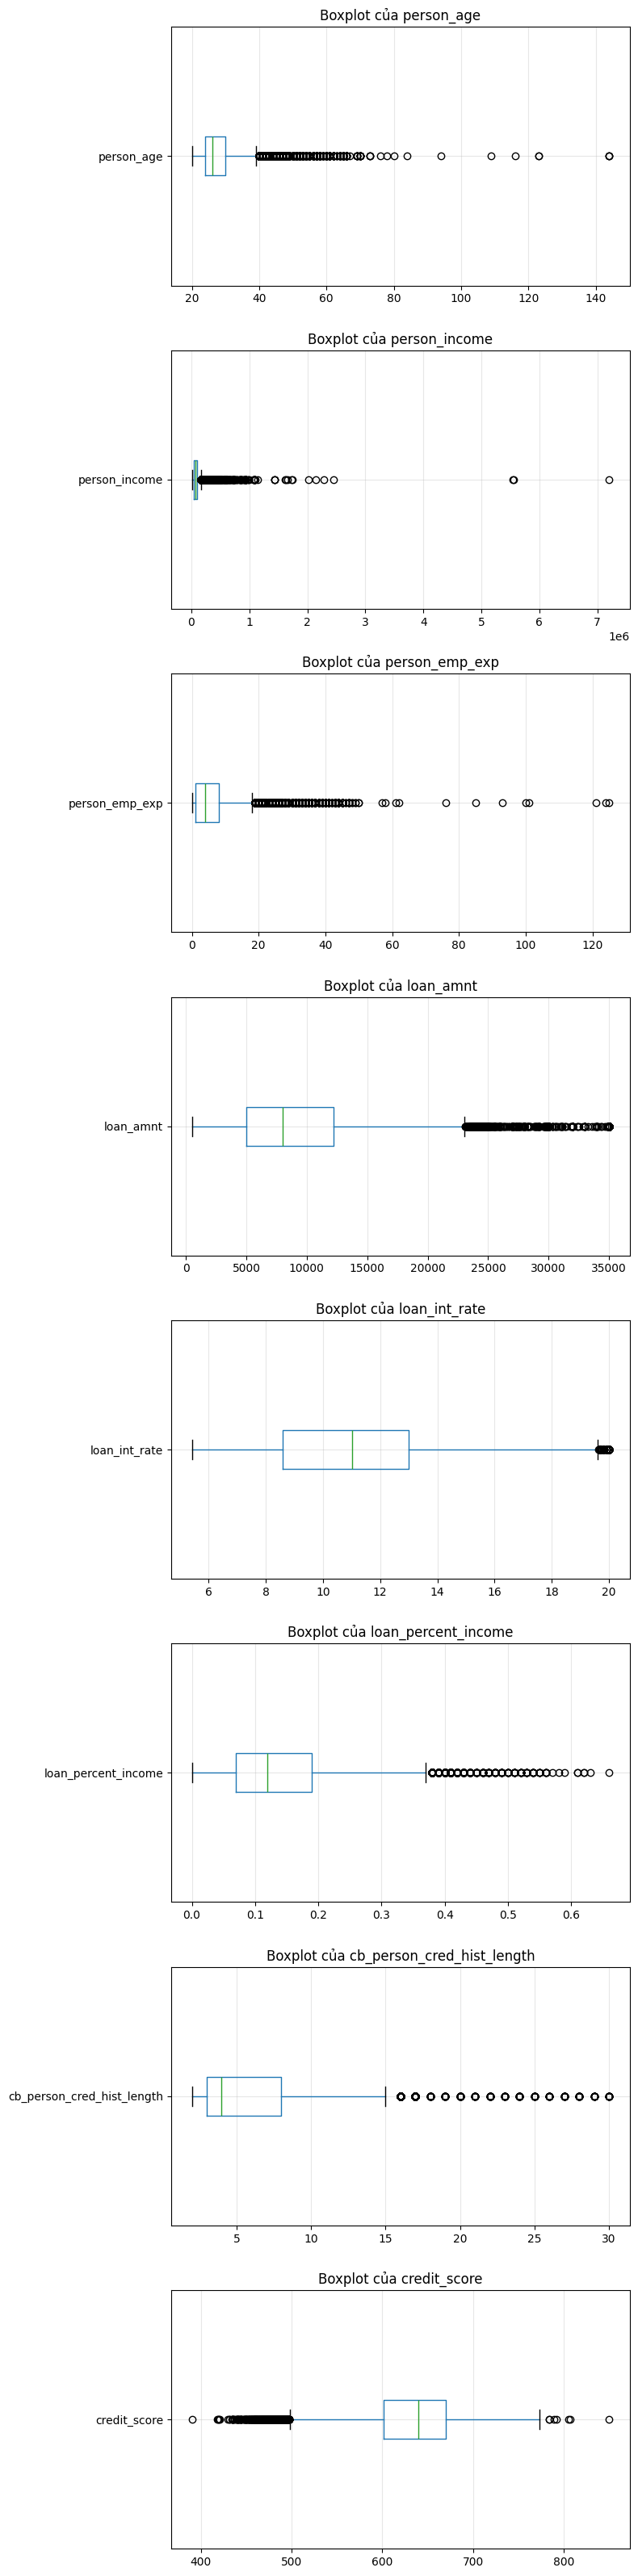

In [ ]:
def plot_boxplots(df, numeric_columns):
    # Tạo figure với số subplot = số cột
    n = len(numeric_columns)
    fig, axes = plt.subplots(nrows=n, figsize=(8, 4*n))  # Kích thước tự điều chỉnh

    # Vẽ từng boxplot
    for i, col in enumerate(numeric_columns):
        df.boxplot(column=col, ax=axes[i], vert=False)  # vert=False để vẽ ngang
        axes[i].set_title(f"Boxplot của {col}", fontsize=12)
        axes[i].grid(True, alpha=0.3)

    plt.tight_layout()  # Tự động căn chỉnh khoảng cách
    plt.show()

# Gọi hàm
plot_boxplots(df, Num_col)

In [ ]:
# Check skew
from scipy.stats import skew
skewness = skew(df[Num_col])
skewness

array([ 2.54806907, 34.1364452 ,  2.59483087,  1.17969196,  0.21377695,
        1.03447767,  1.63166556, -0.61024049])

## **Correlation Matrix For Num_col**

In [ ]:
corr_matrix = df[Num_col + [tar_column]].corr()

<Axes: >

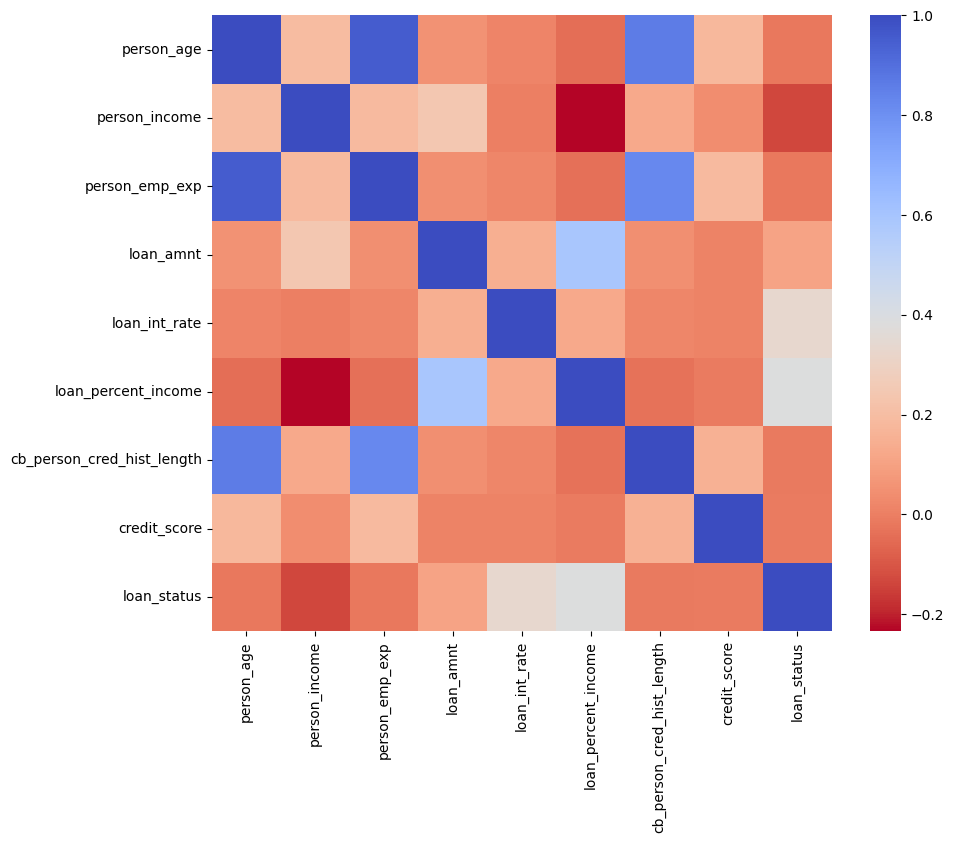

In [ ]:
f, ax1 = plt.subplots(1, 1, figsize=(10,8))

sns.heatmap(corr_matrix, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax1)

In [ ]:
corr_matrix[tar_column].sort_values()

,loan_status
person_income,-0.135808
person_age,-0.021476
person_emp_exp,-0.020481
cb_person_cred_hist_length,-0.014851
credit_score,-0.007647
loan_amnt,0.107714
loan_int_rate,0.332005
loan_percent_income,0.384880
loan_status,1.000000


# **2. Data Preprocessing**

## **Label Encolding**

In [ ]:
df[Cat_col][:20]

,person_gender,person_education,person_home_ownership,loan_intent,previous_loan_defaults_on_file
0,female,Master,RENT,PERSONAL,No
1,female,High School,OWN,EDUCATION,Yes
2,female,High School,MORTGAGE,MEDICAL,No
3,female,Bachelor,RENT,MEDICAL,No
4,male,Master,RENT,MEDICAL,No
5,female,High School,OWN,VENTURE,No
6,female,Bachelor,RENT,EDUCATION,No
7,female,High School,RENT,MEDICAL,No
8,female,Associate,RENT,PERSONAL,No
9,female,High School,OWN,VENTURE,No


In [ ]:
# Xem mỗi cột cat_cols có bao nhiêu phần tử độc lập
for col in Cat_col:
  print(f'{col}: {df[col].nunique()}')

person_gender: 2
person_education: 5
person_home_ownership: 4
loan_intent: 6
previous_loan_defaults_on_file: 2


In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
# Áp dụng Label Encoder cho df[Cat_col]
le=LabelEncoder()
for col in Cat_col:
  df[col]=le.fit_transform(df[col])

In [ ]:
df

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,0,4,71948.0,0,3,35000.0,4,16.02,0.49,3.0,561,0,1
1,21.0,0,3,12282.0,0,2,1000.0,1,11.14,0.08,2.0,504,1,0
2,25.0,0,3,12438.0,3,0,5500.0,3,12.87,0.44,3.0,635,0,1
3,23.0,0,1,79753.0,0,3,35000.0,3,15.23,0.44,2.0,675,0,1
4,24.0,1,4,66135.0,1,3,35000.0,3,14.27,0.53,4.0,586,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27.0,1,0,47971.0,6,3,15000.0,3,15.66,0.31,3.0,645,0,1
44996,37.0,0,0,65800.0,17,3,9000.0,2,14.07,0.14,11.0,621,0,1
44997,33.0,1,0,56942.0,7,3,2771.0,0,10.02,0.05,10.0,668,0,1
44998,29.0,1,1,33164.0,4,3,12000.0,1,13.23,0.36,6.0,604,0,1


In [ ]:
# Lấy giá trị của 1 Row
row_values = df.iloc[3].tolist()  # Trả về list giá trị của hàng đầu tiên
print(row_values)

[23.0, 0.0, 1.0, 79753.0, 0.0, 3.0, 35000.0, 3.0, 15.23, 0.44, 2.0, 675.0, 0.0, 1.0]


## **Standard Scaler**

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [ ]:
pipe = Pipeline([ ('ss', StandardScaler()) ])

In [ ]:
df_ss=df.copy()

In [ ]:
# Áp dụng SS
df_ss[Num_col]=pipe.fit_transform(df_ss[Num_col])

In [ ]:
df_ss

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,-0.953538,0,4,-0.104090,-0.892284,3,4.024953,4,1.683039,4.016394,-0.739109,-1.419814,0,1
1,-1.118963,0,3,-0.846005,-0.892284,2,-1.359209,1,0.044782,-0.684829,-0.996863,-2.549975,1,0
2,-0.457264,0,3,-0.844065,-0.397517,0,-0.646600,3,0.625557,3.443074,-0.739109,0.047412,0,1
3,-0.788113,0,1,-0.007039,-0.892284,3,4.024953,3,1.417829,3.443074,-0.996863,0.840507,0,1
4,-0.622689,1,4,-0.176371,-0.727362,3,4.024953,3,1.095549,4.475050,-0.481354,-0.924130,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,-0.126414,1,0,-0.402231,0.097249,3,0.857799,3,1.562184,1.952442,-0.739109,0.245686,0,1
44996,1.527834,0,0,-0.180537,1.911393,3,-0.092348,2,1.028407,0.003155,1.322928,-0.230171,0,1
44997,0.866135,1,0,-0.290681,0.262171,3,-1.078758,0,-0.331212,-1.028821,1.065174,0.701716,0,1
44998,0.204436,1,1,-0.586348,-0.232595,3,0.382726,1,0.746412,2.525762,0.034155,-0.567237,0,1


In [ ]:
# Phân chia train và test
x_train, x_test, y_train, y_test = train_test_split(df_ss.drop(columns=tar_column,axis=1), df_ss[tar_column], test_size=0.2, random_state=42)

# **3. Feature Importance**

In [ ]:
from sklearn.inspection import permutation_importance
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=42)

In [ ]:
model.fit(x_train[Num_col], y_train)

RandomForestClassifier(random_state=42)

In [ ]:
result = permutation_importance(model, x_test[Num_col], y_test, n_repeats=10, random_state=42)

In [ ]:
feature_importances = pd.Series(result.importances_mean, index=x_train[Num_col].columns).sort_values(ascending=False)

In [ ]:
feature_importances

,0
loan_percent_income,0.068878
loan_int_rate,0.063289
person_income,0.060744
loan_amnt,0.012456
person_age,0.005000
cb_person_cred_hist_length,0.003033
person_emp_exp,0.001144
credit_score,-0.001044


# **4. Modeling ML**

## **Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model_li = LogisticRegression()

In [ ]:
model_li.fit(x_train, y_train)

LogisticRegression()

In [ ]:
y_pred_li = model_li.predict(x_test)

In [ ]:
print(classification_report(y_test, y_pred_li))

              precision    recall  f1-score   support

           0       0.92      0.94      0.93      6990
           1       0.77      0.73      0.75      2010

    accuracy                           0.89      9000
   macro avg       0.84      0.83      0.84      9000
weighted avg       0.89      0.89      0.89      9000



## **Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
model = DecisionTreeClassifier(max_depth=10)

In [ ]:
model.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=10)

In [ ]:
y_pred=model.predict(x_test)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.96      0.95      6990
           1       0.85      0.74      0.79      2010

    accuracy                           0.91      9000
   macro avg       0.89      0.85      0.87      9000
weighted avg       0.91      0.91      0.91      9000



## **Grid Search Hyper Para**

In [ ]:
!pip show xgboost

Name: xgboost
Version: 2.1.4
Summary: XGBoost Python Package
Home-page: 
Author: 
Author-email: Hyunsu Cho <chohyu01@cs.washington.edu>, Jiaming Yuan <jm.yuan@outlook.com>
License: Apache-2.0
Location: /usr/local/lib/python3.11/dist-packages
Requires: numpy, nvidia-nccl-cu12, scipy
Required-by: 


In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint

In [ ]:
param_grid = {
    'n_estimators': [100, 140, 200, 250],
    'max_depth': [5, 8, 12, 16],
    'min_samples_split': [2, 5, 10, 20, 24],
    'max_features': ['sqrt', 'log2', 'auto']
}

In [ ]:
grid_search = GridSearchCV(
    estimator=XGBClassifier(random_state=50),
    param_grid=param_grid,
    cv=5,
    scoring='f1',  # Tối ưu theo F1-score
    n_jobs=-1  # Chạy song song để tiết kiệm thời gian
)

In [ ]:
# Train
grid_search.fit(x_train, y_train)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:22:08] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "max_features", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=50, ...),
             n_jobs=-1,
             param_grid={'max_depth': [5, 8, 12, 16],
                         'max_features': ['sqrt', 'log2', 'auto'],
                         'min_samples_split': [2, 5, 10, 20, 24],
                         'n_estimators': [100, 140, 200, 250]},
             scoring='f1')

In [ ]:
# Lấy Model được train với best para
best_model = grid_search.best_estimator_

In [ ]:
# Precdict
y_pred_rf_grid=best_model.predict(x_test)

In [ ]:
print(classification_report(y_test, y_pred_rf_grid))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96      6990
           1       0.88      0.81      0.84      2010

    accuracy                           0.93      9000
   macro avg       0.91      0.89      0.90      9000
weighted avg       0.93      0.93      0.93      9000



# **5. Deep Learning Method**

## **Pytorch**

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

### **Pytorch Architecture**

In [ ]:
class pytorchnn(nn.Module):
    def __init__(self, input_size, output_size, dropout_rate):
        super(pytorchnn, self).__init__()
        self.fc1 = nn.Linear(input_size, 180)
        self.bn1 = nn.BatchNorm1d(180)  # Thêm BatchNorm
        self.fc2 = nn.Linear(180, 100)
        self.bn2 = nn.BatchNorm1d(100)
        self.fc3 = nn.Linear(100, 40)
        self.bn3 = nn.BatchNorm1d(40)
        self.fc4 = nn.Linear(40, 8)
        self.dropout = nn.Dropout(dropout_rate)
        self.fc5 = nn.Linear(8, output_size)
        self.dropout = nn.Dropout(dropout_rate)
        self.activation = nn.LeakyReLU(0.1)  # Thay ReLU bằng LeakyReLU

    def forward(self, x):
        out = self.activation(self.bn1(self.fc1(x)))
        out = self.dropout(out)
        out = self.activation(self.bn2(self.fc2(out)))
        out = self.dropout(out)
        out = self.activation(self.bn3(self.fc3(out)))
        out = self.fc4(out)
        out = self.dropout(out)
        out = self.fc5(out)
        return out

### **Setup Hyper Parameter**

In [ ]:
#Chuẩn bị các Hyper Parameter
input_size= 13
output_size=1
dropout_rate=0.6

### **Khởi tạo DataLoader**

In [ ]:
# Chia dataset theo 90-10
train_data, test_data = train_test_split(df_ss, test_size=0.1, random_state=42)

In [ ]:
# Trong train_data, lấy 80-20 cho train và val
x_train, x_val, y_train, y_val = train_test_split(train_data.drop(columns=tar_column,axis=1), train_data[tar_column], test_size=0.2, random_state=42)

In [ ]:
x_test, y_test = test_data.drop(columns=tar_column,axis=1), test_data[tar_column]

In [ ]:
# chuyển dữ liệu Numpy Array full numeric sang torch.tensor (dạng array dùng cho Pytorch)
x_train_tensor = torch.tensor(x_train.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32)

x_val_tensor = torch.tensor(x_val.values, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val.values, dtype=torch.float32)

x_test_tensor = torch.tensor(x_test.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32)

In [ ]:
# khởi tạo Dataloader
train_loader = torch.utils.data.DataLoader(
    list(zip(x_train_tensor, y_train_tensor)), batch_size=70, shuffle=True)
val_loader = torch.utils.data.DataLoader(
    list(zip(x_val_tensor, y_val_tensor)), batch_size=70, shuffle=False)
test_loader = torch.utils.data.DataLoader(
    list(zip(x_test_tensor, y_test_tensor)), batch_size=70, shuffle=False)

### **Khởi tạo Model**

In [ ]:
#Kết hợp với lớp pytorchnn trước đó
model_py = pytorchnn(input_size, output_size, dropout_rate)
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model_py.parameters(), lr=0.005, weight_decay=1e-5)

# scheduler
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min',
                                                            factor=0.7,
                                                            patience=10,
                                                            min_lr=1e-6)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model_py.to(device)

pytorchnn(
  (fc1): Linear(in_features=13, out_features=180, bias=True)
  (bn1): BatchNorm1d(180, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc2): Linear(in_features=180, out_features=100, bias=True)
  (bn2): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc3): Linear(in_features=100, out_features=40, bias=True)
  (bn3): BatchNorm1d(40, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc4): Linear(in_features=40, out_features=8, bias=True)
  (dropout): Dropout(p=0.6, inplace=False)
  (fc5): Linear(in_features=8, out_features=1, bias=True)
  (activation): LeakyReLU(negative_slope=0.1)
)

### **Train Model**

In [ ]:
train_loss_history = []
val_loss_history = []
train_acc_history = []
val_acc_history = []
num_epoch = 500

for epoch in range(num_epoch):
    # Train
    model_py.train()
    running_loss = 0.0
    correct_train = 0
    total_train = 0

    for i, (inputs, targets) in enumerate(train_loader):
        inputs = inputs.float().to(device)
        targets = targets.float().to(device).unsqueeze(1)

        # Forward pass
        outputs = model_py(inputs)
        loss = criterion(outputs, targets)

        # Backward và optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Tính loss và accuracy
        running_loss += loss.item()

        # Chuyển outputs thành nhãn 0 hoặc 1 (sử dụng ngưỡng 0.5 cho bài toán nhị phân)
        predicted = (torch.sigmoid(outputs) > 0.5).float()
        correct_train += (predicted == targets).sum().item()
        total_train += targets.size(0)

    # Validation
    model_py.eval()
    val_running_loss = 0.0
    correct_val = 0
    total_val = 0

    with torch.no_grad():
        for inputs, targets in val_loader:
            inputs = inputs.float().to(device)
            targets = targets.float().to(device).unsqueeze(1)

            outputs = model_py(inputs)
            loss = criterion(outputs, targets)
            val_running_loss += loss.item()

            # Tính accuracy cho validation
            predicted = (torch.sigmoid(outputs) > 0.5).float()
            correct_val += (predicted == targets).sum().item()
            total_val += targets.size(0)

    # Tính average loss và accuracy
    avg_train_loss = running_loss / len(train_loader)
    avg_val_loss = val_running_loss / len(val_loader)
    train_acc = correct_train / total_train * 100  # Accuracy train (%)
    val_acc = correct_val / total_val * 100        # Accuracy validation (%)

    # Cập nhật learning rate
    scheduler.step(avg_val_loss)

    # Lưu vào history
    train_loss_history.append(avg_train_loss)
    val_loss_history.append(avg_val_loss)
    train_acc_history.append(train_acc)  # Lưu accuracy train
    val_acc_history.append(val_acc)      # Lưu accuracy validation

    # In thông tin sau mỗi 10 epoch
    if epoch % 10 == 0:
       print(f"Epoch [{epoch+1}/{num_epoch}]: Train Loss: {avg_train_loss:.4f}, Train Acc: {train_acc:.2f}% | Val Loss: {avg_val_loss:.4f}, Val Acc: {val_acc:.2f}%")

Epoch [1/500]: Train Loss: 0.3015, Train Acc: 86.35% | Val Loss: 0.2246, Val Acc: 89.51%
Epoch [11/500]: Train Loss: 0.2396, Train Acc: 89.06% | Val Loss: 0.2111, Val Acc: 90.56%
Epoch [21/500]: Train Loss: 0.2349, Train Acc: 89.45% | Val Loss: 0.2016, Val Acc: 90.96%
Epoch [31/500]: Train Loss: 0.2349, Train Acc: 89.52% | Val Loss: 0.2131, Val Acc: 90.31%
Epoch [41/500]: Train Loss: 0.2334, Train Acc: 89.52% | Val Loss: 0.2064, Val Acc: 90.46%
Epoch [51/500]: Train Loss: 0.2311, Train Acc: 89.66% | Val Loss: 0.1982, Val Acc: 91.19%
Epoch [61/500]: Train Loss: 0.2300, Train Acc: 89.70% | Val Loss: 0.1986, Val Acc: 91.25%
Epoch [71/500]: Train Loss: 0.2272, Train Acc: 89.80% | Val Loss: 0.1980, Val Acc: 90.86%
Epoch [81/500]: Train Loss: 0.2261, Train Acc: 89.77% | Val Loss: 0.1941, Val Acc: 91.42%
Epoch [91/500]: Train Loss: 0.2230, Train Acc: 90.01% | Val Loss: 0.1940, Val Acc: 91.64%
Epoch [101/500]: Train Loss: 0.2232, Train Acc: 89.95% | Val Loss: 0.1897, Val Acc: 91.59%
Epoch [111

In [ ]:
# Last record: Opti Adam, LR=0.004, Batch 70

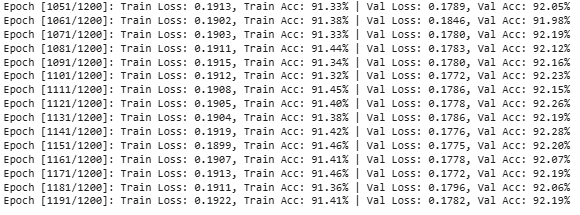

In [ ]:
# Định nghĩa hàm get_prediction

def get_predictions(model, data_loader):
    model.eval()  # Set model to evaluation mode
    predictions = []
    actuals = []
    with torch.no_grad():  # Disable gradient calculation
        for inputs, targets in data_loader:
            inputs = inputs.float().to(device)
            targets = targets.to(device)

            # Forward pass to get outputs
            outputs = model(inputs)

            # Move outputs and targets to CPU and convert to numpy arrays
            predictions.extend(outputs.cpu().numpy())
            actuals.extend(targets.cpu().numpy())

    # Convert lists to numpy arrays for easy handling
    predictions = np.array(predictions).squeeze()
    actuals = np.array(actuals).squeeze().astype(int)

    return predictions, actuals

In [ ]:
predictions, actuals = get_predictions(model_py, test_loader)

In [ ]:
# Đưa predictions về dạng nhị phân 0 hoặc 1 dựa trên ngưỡng 0,5
predictions_binary = np.where(predictions > 0.5, 1, 0)

In [ ]:
# Evaluate
print(classification_report(actuals, predictions_binary))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94      3444
           1       0.92      0.64      0.75      1056

    accuracy                           0.90      4500
   macro avg       0.91      0.81      0.85      4500
weighted avg       0.90      0.90      0.90      4500



# **6. Download the model**

In [ ]:
import joblib

In [ ]:
# Model đạt Metric cao nhất Accuracy =93% là model: best_model
# Tạo pipeline để lưu mô hình best_model vào fiel pkl
joblib.dump(best_model, 'model_ml.joblib')

['model_ml.joblib']

In [ ]:
# Chuẩn bị file requirement.txt bao gồm các thư viện cần cài
!pip freeze > requirements.txt

In [ ]:
# Dowload requirement.txt
from google.colab import files
files.download('requirements.txt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Download model
files.download('model_ml.joblib')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **7. Kiểm thử kết quả**

In [ ]:
# Lấy giá trị của 1 Row bất kỳ, bao gồm 13 feature và 1 target label
row_values_list = df_ss.iloc[333].tolist()
print(row_values2)

[-0.29183884198596677, 1.0, 3.0, 1.530048383280192, -0.3975174998410627, 3.0, 2.322607852021433, 3.0, 0.6255571865157291, -0.22617344394552955, -0.7391085358746026, -0.5275819342630713, 1.0, 0.0]


In [ ]:
### Với các 13 Feature trên giá trị Target Label trả về là 0 ###